read image from dataset

In [1]:
from utils import list_all_files
negative_paths = list(list_all_files('../dataset/Gender/cropImage/Female/', ['.jpg']))
print 'loaded', len(negative_paths), 'female examples'
positive_paths = list(list_all_files('../dataset/Gender/cropImage/Male', ['.jpg']))
print 'loaded', len(positive_paths), 'male examples'
train_data = [(path, 0) for path in negative_paths] + [(path, 1) for path in positive_paths]

loaded 29119 female examples
loaded 7229 male examples


For each path, we will load the image with `imread` and resize from 64x64 to 32x32 with `block_reduce`. This can take up to **10 seconds**.

In [2]:
import numpy as np
from skimage.measure import block_reduce
from skimage.io import imread

def examples_to_dataset(examples, block_size=2):
    X = []
    y = []
    for path, label in examples:
        img = imread(path, as_grey=True)
        img = block_reduce(img, block_size=(block_size, block_size), func=np.mean)
        X.append(img)
        y.append(label)
    return np.asarray(X), np.asarray(y)

%time x_train, y_train = examples_to_dataset(train_data)

/opt/anaconda3/envs/py2version/lib/python2.7/site-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


CPU times: user 27.9 s, sys: 5.31 s, total: 33.2 s
Wall time: 44 s


Then we turn `X` and `y` into numpy arrays and coerce them into the right shape and range.

In [3]:
x_train = x_train.astype(np.float32) / 255.
y_train = y_train.astype(np.int32)
print x_train.dtype, x_train.min(), x_train.max(), x_train.shape
print y_train.dtype, y_train.min(), y_train.max(), y_train.shape

float32 0.0 1.0 (36348, 32, 32)
int32 0 1 (36348,)


Let's take a look at a few of the images.

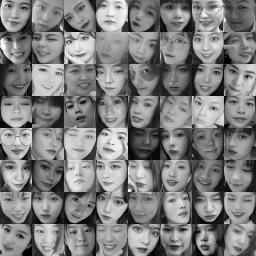

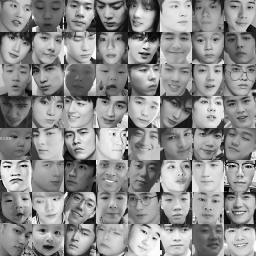

In [4]:
from utils import make_mosaic, show_array
show_array(255 * make_mosaic(x_train[:len(negative_paths)], 8), fmt='jpeg') # negative at the beginning
show_array(255 * make_mosaic(x_train[-len(positive_paths):], 8), fmt='jpeg') # positive at the end

Now we save the data to disk for so we can load it quickly when working with it later. Keras likes to use data in the (rows, cols, channels) format so we make a small change to the images before saving them.

In [5]:
x_train = np.expand_dims(x_train, axis=-1)
np.save('x_train.npy', x_train)
np.save('y_train.npy', y_train)

In [3]:
from utils import list_all_files
negative_paths = list(list_all_files('../dataset/Gender/testdata/Female/', ['.jpg']))
print 'loaded', len(negative_paths), 'female test examples'
positive_paths = list(list_all_files('../dataset/Gender/testdata/Male', ['.jpg']))
print 'loaded', len(positive_paths), 'male test examples'
test_data = [(path, 0) for path in negative_paths] + [(path, 1) for path in positive_paths]

loaded 1000 female test examples
loaded 1000 male test examples


In [4]:
%time x_test, y_test = examples_to_dataset(test_data)

CPU times: user 1.39 s, sys: 269 ms, total: 1.66 s
Wall time: 2.06 s


In [5]:
x_test = x_test.astype(np.float32) / 255.
y_test = y_test.astype(np.int32)
print x_test.dtype, x_test.min(), x_test.max(), x_test.shape
print y_test.dtype, y_test.min(), y_test.max(), y_test.shape

float32 0.0 1.0 (2000, 32, 32)
int32 0 1 (2000,)


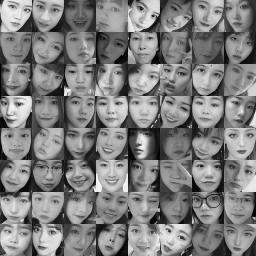

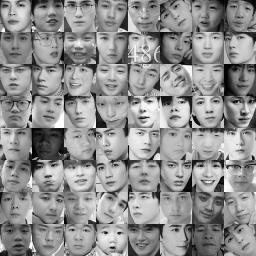

In [6]:
from utils import make_mosaic, show_array
show_array(255 * make_mosaic(x_test[:len(negative_paths)], 8), fmt='jpeg') # negative at the beginning
show_array(255 * make_mosaic(x_test[-len(positive_paths):], 8), fmt='jpeg') # positive at the end

In [7]:
x_test = np.expand_dims(x_test, axis=-1)
np.save('x_test.npy', x_test)
np.save('y_test.npy', y_test)